In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob

In [2]:
df = pd.read_csv(
    '../data/train.csv', 
    encoding='utf-8', 
    on_bad_lines='warn',
    usecols=lambda column: column not in ['id']
)

In [3]:
df

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
class Preprocessing:
    def __init__(self, df):
        self._df = df
    
    def _set_dtypes(self):
        self._df['author'] = self._df['author'].astype('str')
        self._df['title'] = self._df['title'].astype('str')
        self._df['text'] = self._df['text'].astype('str')
        self._df['label'] = self._df['label'].astype('bool')
    
    def _remove_duplicates(self):
        self._df = self._df.drop_duplicates()
    
    def preprocess(self):
        self._set_dtypes()
        self._remove_duplicates()
        
        return self._df

In [5]:
def preprocess(df):
    preprocessing = Preprocessing(df)
    df = preprocessing.preprocess()
    return df

In [6]:
train = preprocess(df)

In [7]:
train

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,True
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,False
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",True
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,True
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,True
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,False
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,False
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,False
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",True


In [8]:
print(f"Finished Preprocessing: {train.isna().any(axis=1).sum()} rows with NaN values")

Finished Preprocessing: 0 rows with NaN values


In [9]:
train.to_csv('../data/preprocessed_train.csv', index=False)

# EDA

In [10]:
def type_pie_chart(df): 
    # Assuming you have already created the DataFrame 'df' as described earlier

    # Count the occurrences of each 'type'
    type_counts = df['label'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(type_counts, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Fake news"')

    # Create a legend outside the circle
    plt.legend(type_counts.index, loc="center left", bbox_to_anchor=(0.75, 1))

    # Show the pie chart
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [11]:
def title_word_cloud(df): 
    # Create separate DataFrames for "fake" and "non-fake" news
    fake_news_df = df[df['label'] == True]
    non_fake_news_df = df[df['label'] == False]

    # Combine all text content into a single string for "fake" news
    fake_text = ' '.join(fake_news_df['title'].dropna())

    # Generate the word cloud for "fake" news
    wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

    # Combine all text content into a single string for "non-fake" news
    non_fake_text = ' '.join(non_fake_news_df['title'].dropna())

    # Generate the word cloud for "non-fake" news
    wordcloud_non_fake = WordCloud(width=800, height=400, background_color='white').generate(non_fake_text)

    # Create subplots for both word clouds
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_fake, interpolation='bilinear')
    plt.axis('off')  # Remove axis
    plt.title('Word Cloud of Fake News Titles')

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_non_fake, interpolation='bilinear')
    plt.axis('off')  # Remove axis
    plt.title('Word Cloud of Non-Fake News Titles')

    plt.tight_layout()
    plt.show()

In [12]:
def sentiment_scatter(df):
    def get_sentiment_polarity(text):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity

    # Create DataFrames for "fake" and "non-fake" news
    fake_news_df = df[df['label'] == True].copy()
    non_fake_news_df = df[df['label'] == False].copy()

    # Calculate sentiment polarity for title and content for both DataFrames
    fake_news_df['title_sentiment'] = fake_news_df['title'].apply(get_sentiment_polarity)
    fake_news_df['content_sentiment'] = fake_news_df['text'].apply(get_sentiment_polarity)
    non_fake_news_df['title_sentiment'] = non_fake_news_df['title'].apply(get_sentiment_polarity)
    non_fake_news_df['content_sentiment'] = non_fake_news_df['text'].apply(get_sentiment_polarity)

    # Calculate correlation between title and content sentiment for both DataFrames
    fake_correlation = fake_news_df[['content_sentiment', 'title_sentiment']].corr().iloc[0, 1]
    non_fake_correlation = non_fake_news_df[['content_sentiment', 'title_sentiment']].corr().iloc[0, 1]

    # Create scatter plots for "fake" and "non-fake" news with correlation in title
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(fake_news_df['content_sentiment'], fake_news_df['title_sentiment'], alpha=0.5)
    plt.xlabel('Content Sentiment')
    plt.ylabel('Title Sentiment')
    plt.title(f'Scatter Plot of Sentiment (Fake News)\nCorrelation: {fake_correlation:.2f}')

    plt.subplot(1, 2, 2)
    plt.scatter(non_fake_news_df['content_sentiment'], non_fake_news_df['title_sentiment'], alpha=0.5)
    plt.xlabel('Content Sentiment')
    plt.ylabel('Title Sentiment')
    plt.title(f'Scatter Plot of Sentiment (Non-Fake News)\nCorrelation: {non_fake_correlation:.2f}')

    plt.tight_layout()
    plt.show()

In [13]:
def sentiment_heatmap(df): 
    # Assuming your DataFrame 'df' has columns: 'type', 'title', and 'content'

    # Function to calculate sentiment polarity using TextBlob
    def get_sentiment_polarity(text):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity

    # Define sentiment categories
    sentiment_categories = ["Negative", "Neutral", "Positive"]

    # Define sentiment discretization function
    def discretize_sentiment(polarity):
        if polarity < -1/3:
            return "Negative"
        elif -1/3 <= polarity <= 1/3:
            return "Neutral"
        else:
            return "Positive"

    # Create DataFrames for "fake" and "non-fake" news
    fake_news_df = df[df['label'] == True].copy()
    non_fake_news_df = df[df['label'] == False].copy()

    # Calculate sentiment polarity for title and content for both DataFrames
    fake_news_df['title_sentiment'] = fake_news_df['title'].apply(get_sentiment_polarity)
    fake_news_df['content_sentiment'] = fake_news_df['text'].apply(get_sentiment_polarity)
    non_fake_news_df['title_sentiment'] = non_fake_news_df['title'].apply(get_sentiment_polarity)
    non_fake_news_df['content_sentiment'] = non_fake_news_df['text'].apply(get_sentiment_polarity)

    # Discretize sentiment into categories
    fake_news_df['title_sentiment_category'] = fake_news_df['title_sentiment'].apply(discretize_sentiment)
    fake_news_df['content_sentiment_category'] = fake_news_df['content_sentiment'].apply(discretize_sentiment)
    non_fake_news_df['title_sentiment_category'] = non_fake_news_df['title_sentiment'].apply(discretize_sentiment)
    non_fake_news_df['content_sentiment_category'] = non_fake_news_df['content_sentiment'].apply(discretize_sentiment)

    # Create pivot tables for the heatmaps and fill missing values
    pivot_fake = fake_news_df.pivot_table(index='title_sentiment_category', columns='content_sentiment_category', aggfunc='size', fill_value=0)
    pivot_fake = pivot_fake.reindex(columns=sentiment_categories, index=sentiment_categories, fill_value=0)

    pivot_non_fake = non_fake_news_df.pivot_table(index='title_sentiment_category', columns='content_sentiment_category', aggfunc='size', fill_value=0)
    pivot_non_fake = pivot_non_fake.reindex(columns=sentiment_categories, index=sentiment_categories, fill_value=0)

    # Create the subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the heatmap for "fake" news
    sns.heatmap(pivot_fake, annot=True, fmt='d', cmap='coolwarm', cbar=True, ax=axes[0])
    axes[0].set_xlabel('Content Sentiment Category')
    axes[0].set_ylabel('Title Sentiment Category')
    axes[0].set_title('Sentiment Heatmap (Title vs. Content) - Fake News')

    # Plot the heatmap for "non-fake" news
    sns.heatmap(pivot_non_fake, annot=True, fmt='d', cmap='coolwarm', cbar=True, ax=axes[1])
    axes[1].set_xlabel('Content Sentiment Category')
    axes[1].set_ylabel('Title Sentiment Category')
    axes[1].set_title('Sentiment Heatmap (Title vs. Content) - Non-Fake News')

    plt.tight_layout()
    plt.show()

In [14]:
def nlp_exploratory_analysis(df): 
    type_pie_chart(df)
    title_word_cloud(df)
    sentiment_scatter(df)
    sentiment_heatmap(df)

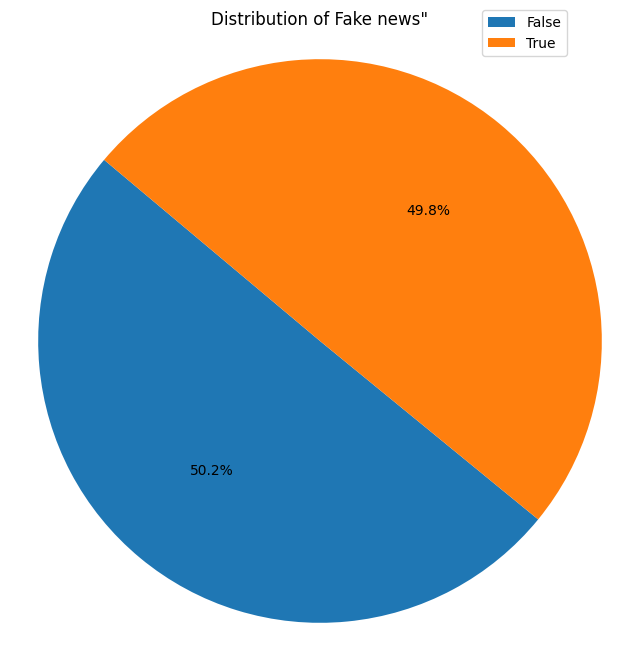

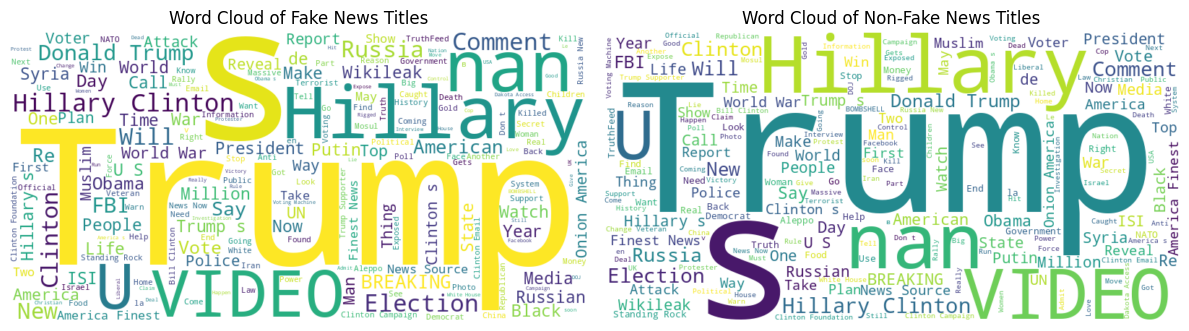

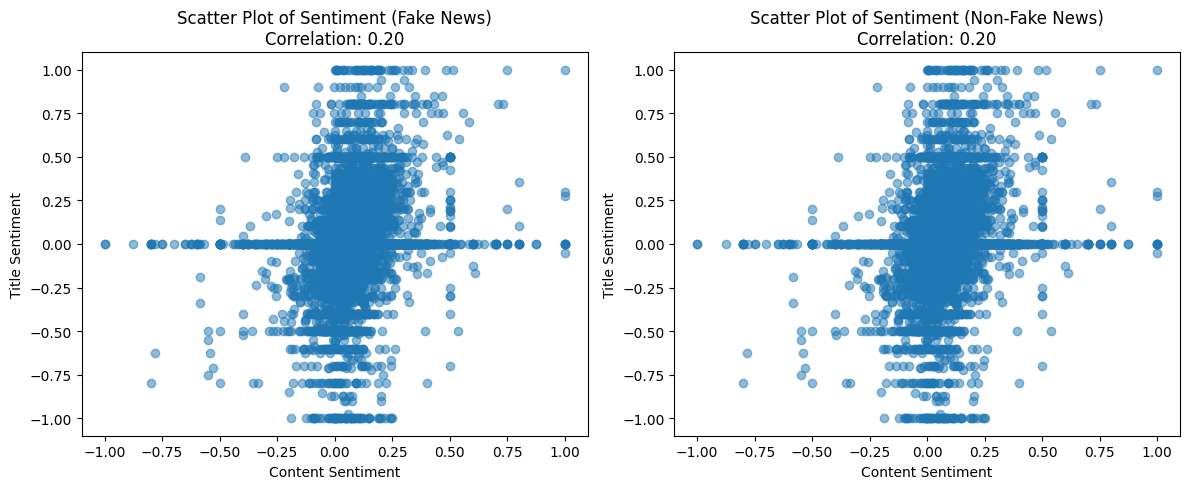

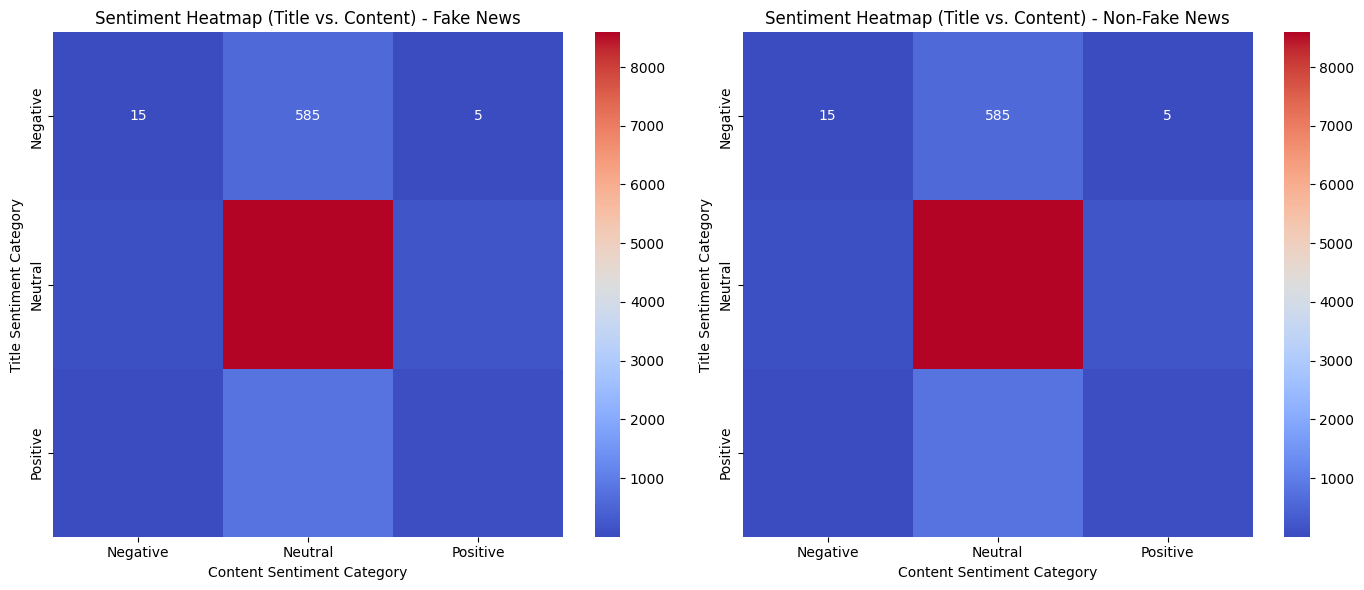

In [15]:
nlp_exploratory_analysis(train)